# Exploratory Data Analysis
This notebook contains the exploratory data analysis for a synthetic metobolomics dataset.

## Importing the libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [7]:
raw_data = pd.read_csv('../data/synthetic_dataset/raw_data.csv')
print(raw_data.shape)

NameError: name 'pd' is not defined

There are 2000 samples and 15 features.

In [ ]:
raw_data.head()

,Unnamed: 0,metabolite_1,metabolite_2,metabolite_3,metabolite_4,metabolite_5,metabolite_6,metabolite_7,metabolite_8,metabolite_9,metabolite_10,metabolite_12,metabolite_11,diet_score,id
0,1,9.048231,9.677682,8.638837,10.226225,10.461779,7.747896,9.041884,10.029460,10.429280,10.454420,8.304230,7.940492,39,1
1,2,11.341378,8.019771,9.913387,8.781492,7.767118,10.200159,8.098116,8.660861,9.857240,9.035729,9.049864,8.685565,10,2
2,3,10.250361,12.012839,9.694205,9.457462,9.563004,8.770521,10.728428,12.042004,10.827459,10.427162,8.856088,9.011202,5,3
3,4,9.859665,11.297457,11.043138,11.866012,9.038951,7.618633,8.351797,11.558762,8.353511,8.692950,9.367732,9.930908,44,4
4,5,9.835731,9.836540,8.786516,10.582722,8.909350,9.185447,10.950472,9.084519,8.878701,7.352292,8.866275,7.986685,19,5


In [ ]:
raw_data.describe()

,Unnamed: 0,metabolite_1,metabolite_2,metabolite_3,metabolite_4,metabolite_5,metabolite_6,metabolite_7,metabolite_8,metabolite_9,metabolite_10,metabolite_12,metabolite_11,diet_score,id
count,2000.000000,1967.000000,1961.000000,1967.000000,1957.000000,1956.000000,1976.000000,1955.000000,1952.000000,1969.000000,1948.000000,1954.000000,1965.000000,2000.000000,2000.000000
mean,1000.500000,9.978907,10.343052,9.390146,10.725604,9.610514,8.903692,9.439477,10.547380,9.979401,9.432971,9.425877,9.129498,24.964500,1000.500000
std,577.494589,1.097590,1.070017,1.045787,1.071788,1.072529,1.029097,1.063426,1.152376,1.044811,1.067948,0.997751,1.001109,14.599069,577.494589
min,1.000000,5.908428,5.937746,5.852083,5.971269,5.869603,5.808877,5.856052,5.959074,5.906186,5.854385,5.856246,5.831085,0.000000,1.000000
25%,500.750000,9.232208,9.633436,8.647155,10.008011,8.902828,8.206495,8.739609,9.747823,9.283396,8.724576,8.755718,8.494183,12.000000,500.750000
50%,1000.500000,9.987730,10.348376,9.407064,10.728574,9.632224,8.910815,9.419977,10.552398,10.002177,9.437082,9.456697,9.131133,25.000000,1000.500000
75%,1500.250000,10.710392,11.095472,10.128366,11.460696,10.347143,9.568574,10.174181,11.331627,10.682028,10.145833,10.076908,9.824538,37.000000,1500.250000
max,2000.000000,13.798028,13.255009,12.708958,14.326335,13.402387,12.444025,13.322919,14.353232,14.390551,12.534109,12.425624,12.072967,50.000000,2000.000000


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2000 non-null   int64  
 1   metabolite_1   1967 non-null   float64
 2   metabolite_2   1961 non-null   float64
 3   metabolite_3   1967 non-null   float64
 4   metabolite_4   1957 non-null   float64
 5   metabolite_5   1956 non-null   float64
 6   metabolite_6   1976 non-null   float64
 7   metabolite_7   1955 non-null   float64
 8   metabolite_8   1952 non-null   float64
 9   metabolite_9   1969 non-null   float64
 10  metabolite_10  1948 non-null   float64
 11  metabolite_12  1954 non-null   float64
 12  metabolite_11  1965 non-null   float64
 13  diet_score     2000 non-null   int64  
 14  id             2000 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 234.5 KB


In [ ]:
raw_data.isnull().sum()

Unnamed: 0        0
metabolite_1     33
metabolite_2     39
metabolite_3     33
metabolite_4     43
metabolite_5     44
metabolite_6     24
metabolite_7     45
metabolite_8     48
metabolite_9     31
metabolite_10    52
metabolite_12    46
metabolite_11    35
diet_score        0
id                0
dtype: int64

## Handling missing data

In [ ]:
# fill na with mean value of the column
metabolites = raw_data.columns[1:-2]
for col in metabolites:
    raw_data[col].fillna(raw_data[col].mean(), inplace=True)


## Remove metabolites with low variance

In [ ]:
# remove metobiletes with low variance
metabolites = raw_data.columns[1:-2]
low_var_metabolites = []
for col in metabolites:
    print(col, raw_data[col].var())
    if raw_data[col].var() < 0.1:
        low_var_metabolites.append(col)
print(len(low_var_metabolites))

raw_data.drop(low_var_metabolites, axis=1, inplace=True)


metabolite_1 1.1848166042000208
metabolite_2 1.1225998433435493
metabolite_3 1.075616466268084
metabolite_4 1.1240198002120687
metabolite_5 1.1249989699463323
metabolite_6 1.046324840418006
metabolite_7 1.1054171902378134
metabolite_8 1.2960832971175171
metabolite_9 1.0747020164846526
metabolite_10 1.1108445348280884
metabolite_12 0.9725998599152199
metabolite_11 0.9846712580885825
0


In [ ]:
raw_data['diet_score'].value_counts()

27    54
42    50
0     50
2     50
30    48
33    47
36    46
14    46
22    46
49    45
9     45
8     45
18    44
29    43
10    43
40    43
11    43
50    42
23    41
21    41
34    41
35    40
32    40
24    39
31    39
28    39
44    39
37    37
4     37
47    37
13    36
41    36
25    36
26    35
17    35
19    35
16    35
7     35
12    35
43    34
20    34
45    33
1     33
38    33
3     32
46    32
5     31
39    31
48    30
15    30
6     29
Name: diet_score, dtype: int64

## Visualize the distribution of the diet_score variable

<Axes: >

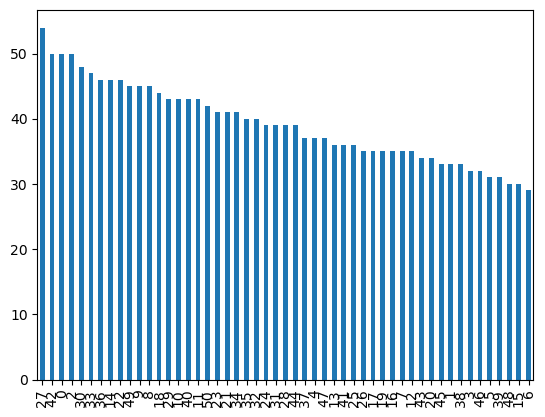

In [ ]:
raw_data['diet_score'].value_counts().plot(kind='bar')

## Visualize the distribution of the diet_score variable for each group

<Axes: ylabel='diet_score'>

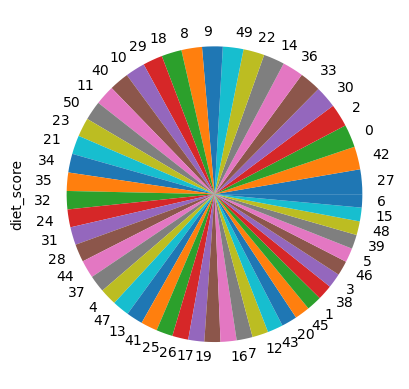

In [ ]:
raw_data['diet_score'].value_counts().plot(kind='pie')

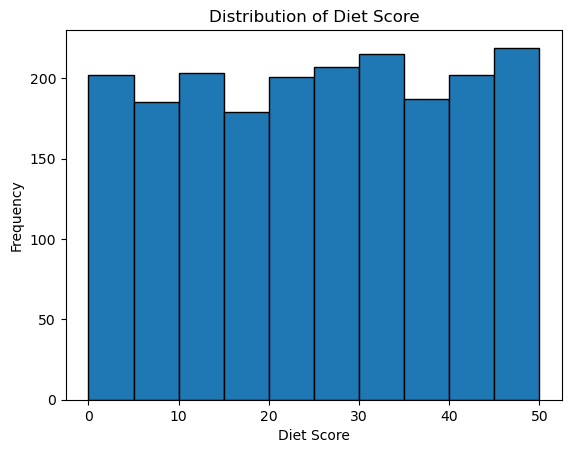

In [ ]:
# Plotting the histogram for the 'diet_score' column
raw_data['diet_score'].plot(kind='hist', edgecolor='black', bins=10)
plt.title('Distribution of Diet Score')
plt.xlabel('Diet Score')
plt.ylabel('Frequency')
plt.show()

## Visualize metabolites correlation

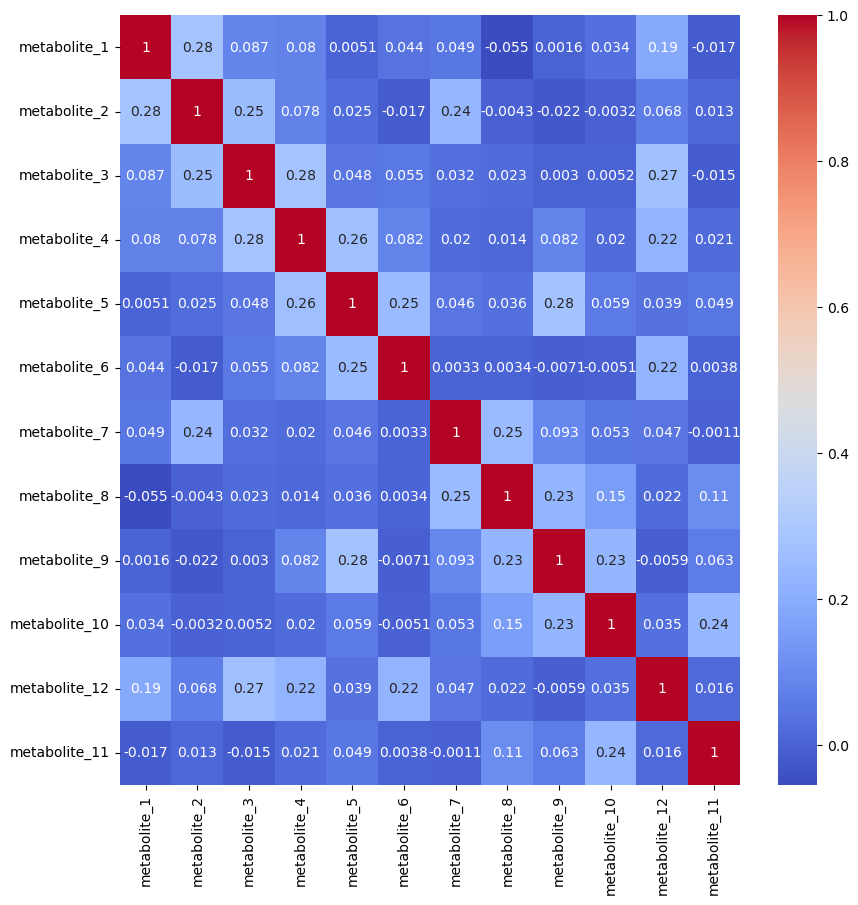

In [ ]:
# heatmap of correlation for metabolites
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.iloc[:, 1:-2].corr(), annot=True, cmap='coolwarm')
plt.show()

## Visualize metabolites correlation for each diet score

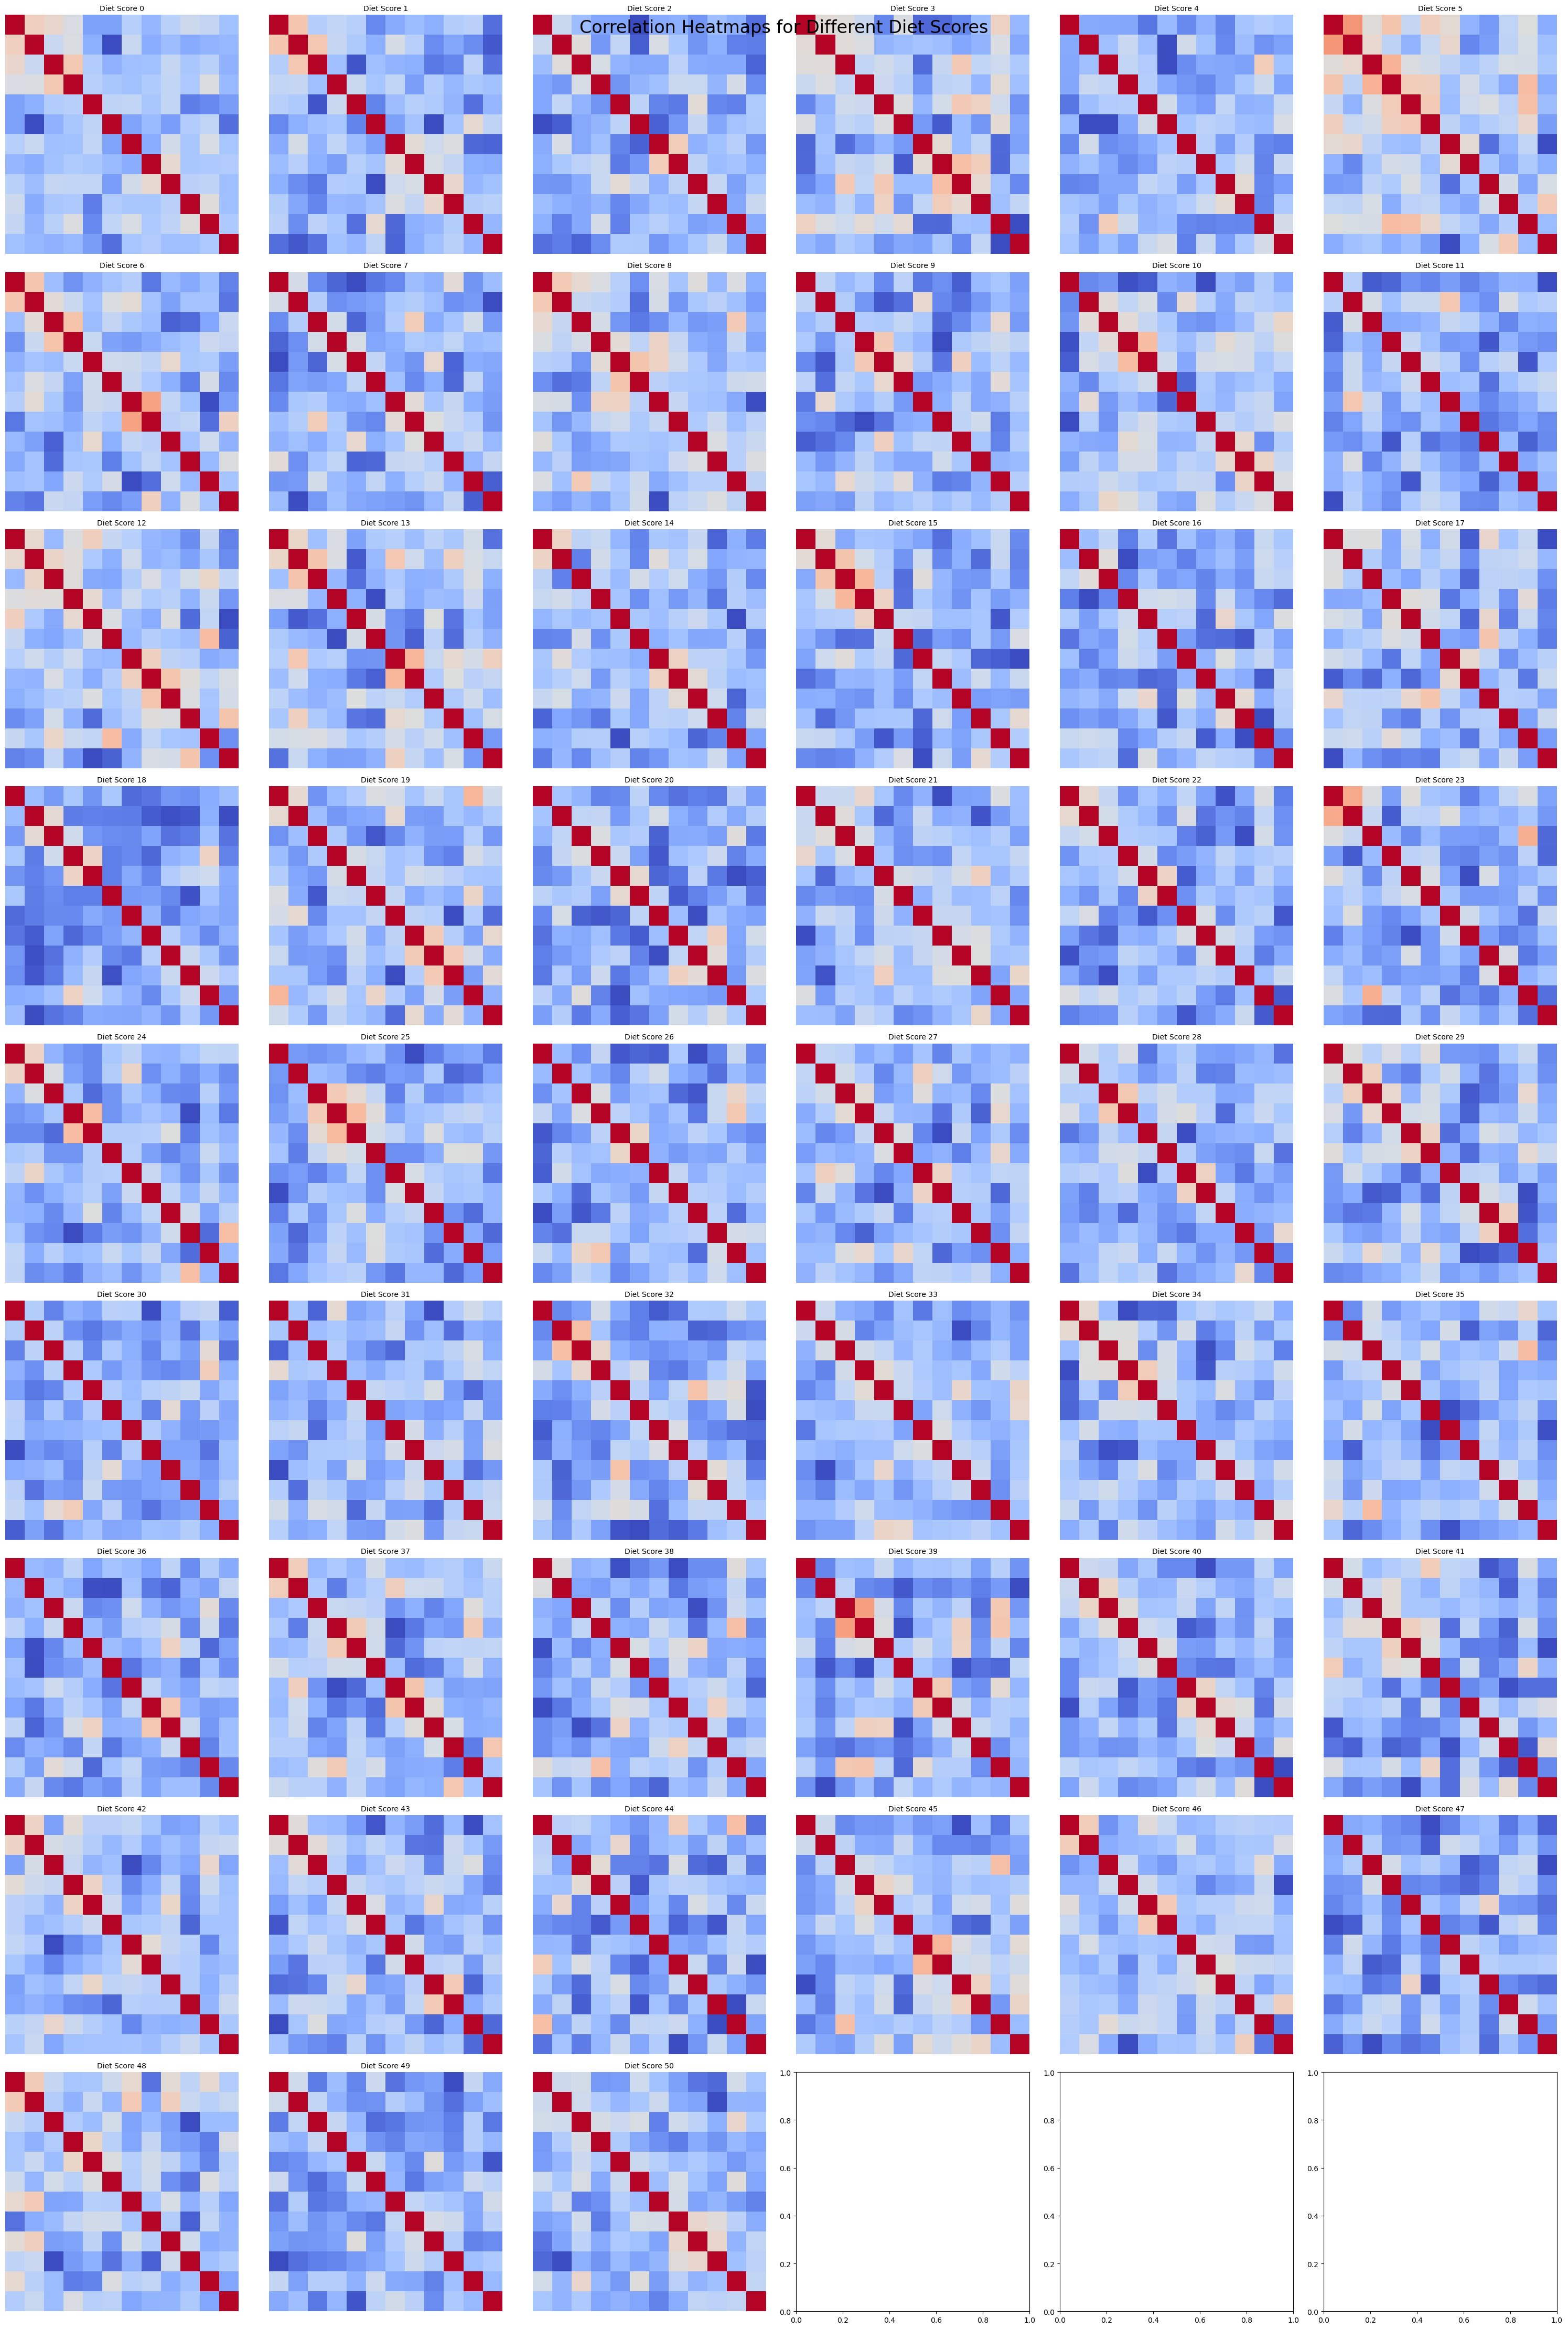

In [ ]:


diet_scores = raw_data['diet_score'].unique()
ordered_diet_scores = np.sort(diet_scores)


fig, axes = plt.subplots(9, 6, figsize=(30, 45))  
fig.suptitle('Correlation Heatmaps for Different Diet Scores', fontsize=24)

for idx, score in enumerate(ordered_diet_scores):
    ax = axes[idx//6, idx%6]  # Adjusted the indexing for 9x6 grid
    sns.heatmap(raw_data.loc[raw_data['diet_score'] == score].iloc[:, 1:-2].corr(), annot=False, cmap='coolwarm', ax=ax, cbar=False)  
    ax.set_title('Diet Score {}'.format(score), fontsize=10)
    ax.axis('off')  # Hide axis labels for clarity

plt.tight_layout()
plt.show()

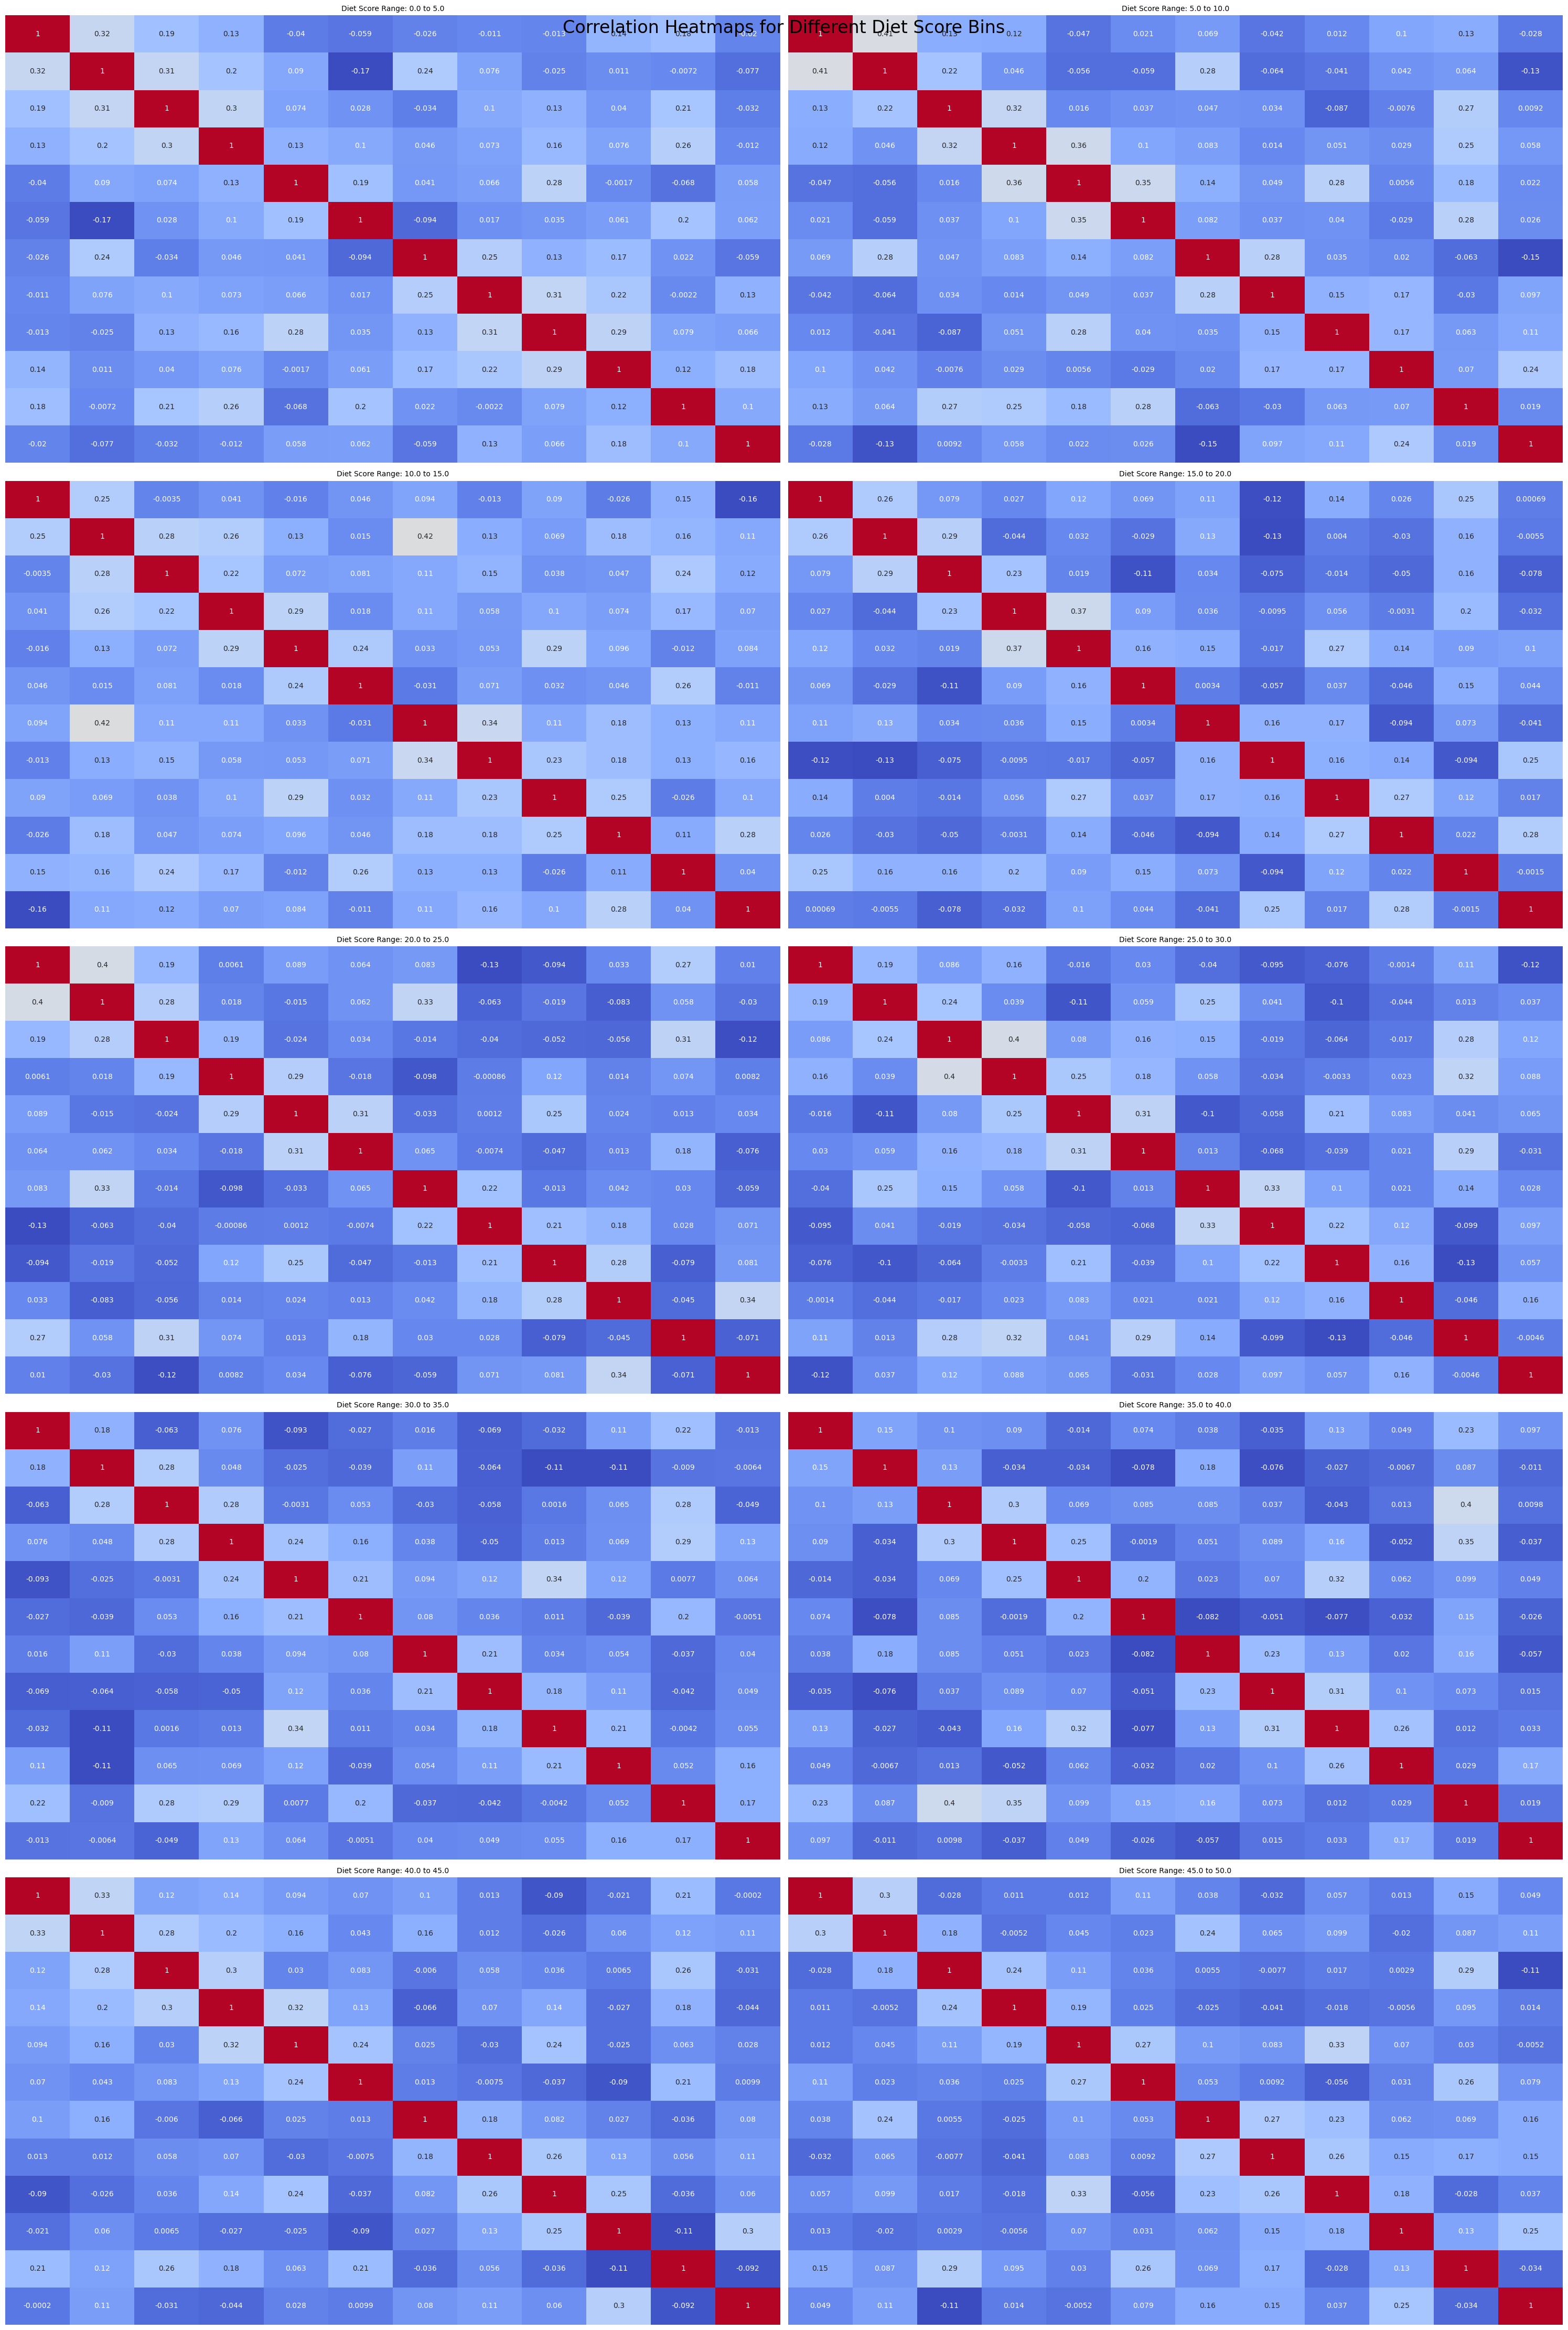

In [ ]:
# Define the number of bins
num_bins = 10

# Create bins for the 'diet_score'
bins = np.linspace(raw_data['diet_score'].min(), raw_data['diet_score'].max(), num_bins + 1) 
labels = [(round(bins[i], 2), round(bins[i+1], 2)) for i in range(len(bins)-1)]
raw_data['binned_diet_score'] = pd.cut(raw_data['diet_score'], bins=bins, labels=labels, right=False)

# Get the unique bins
ordered_bins = raw_data['binned_diet_score'].cat.categories

fig, axes = plt.subplots(5, 2, figsize=(30, 45))  
fig.suptitle('Correlation Heatmaps for Different Diet Score Bins', fontsize=24)

for idx, bin_range in enumerate(ordered_bins):
    ax = axes[idx//2, idx%2]  
    subset_data = raw_data[raw_data['binned_diet_score'] == bin_range]
    sns.heatmap(subset_data.iloc[:, 1:-3].corr(), annot=True, cmap='coolwarm', ax=ax, cbar=False)  
    ax.set_title('Diet Score Range: {} to {}'.format(bin_range[0], bin_range[1]), fontsize=10)
    ax.axis('off')  

plt.tight_layout()
plt.show()


In [ ]:
raw_data

,Unnamed: 0,metabolite_1,metabolite_2,metabolite_3,metabolite_4,metabolite_5,metabolite_6,metabolite_7,metabolite_8,metabolite_9,metabolite_10,metabolite_12,metabolite_11,diet_score,id,binned_diet_score
0,1,9.048231,9.677682,8.638837,10.226225,10.461779,7.747896,9.041884,10.029460,10.429280,10.454420,8.304230,7.940492,39,1,"(35.0, 40.0)"
1,2,11.341378,8.019771,9.913387,8.781492,7.767118,10.200159,8.098116,8.660861,9.857240,9.035729,9.049864,8.685565,10,2,"(10.0, 15.0)"
2,3,10.250361,12.012839,9.694205,9.457462,9.563004,8.770521,10.728428,12.042004,10.827459,10.427162,8.856088,9.011202,5,3,"(5.0, 10.0)"
3,4,9.859665,11.297457,11.043138,11.866012,9.038951,7.618633,8.351797,11.558762,8.353511,8.692950,9.367732,9.930908,44,4,"(40.0, 45.0)"
4,5,9.835731,9.836540,8.786516,10.582722,8.909350,9.185447,10.950472,9.084519,8.878701,7.352292,8.866275,7.986685,19,5,"(15.0, 20.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,10.567062,11.439688,10.738326,10.110216,11.256435,9.760290,9.503362,10.756461,11.006141,9.545853,11.061050,8.399341,13,1996,"(10.0, 15.0)"
1996,1997,10.454019,11.828853,10.808960,11.577188,11.161085,8.813979,11.541485,11.745589,10.285698,7.495861,10.228626,9.095093,19,1997,"(15.0, 20.0)"
1997,1998,9.498805,10.413659,8.744462,8.786311,9.150890,8.487991,8.544688,11.952103,10.686616,10.315610,9.392795,8.527650,14,1998,"(10.0, 15.0)"
1998,1999,7.883581,7.299386,8.879619,10.792247,7.929996,7.977362,9.166899,9.642682,10.565282,8.448750,6.717713,10.215624,46,1999,"(45.0, 50.0)"


In [ ]:
from scipy.stats import pearsonr

correlations = {}
p_values = {}

for metabolite in raw_data.columns[1:-3]:
    corr, p_value = pearsonr(raw_data['diet_score'], raw_data[metabolite])
    correlations[metabolite] = corr
    p_values[metabolite] = p_value

correlations_df = pd.DataFrame(list(correlations.items()), columns=['Metabolite', 'Correlation'])
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Metabolite', 'P-Value'])

# Display the results
print(correlations_df)
print(p_values_df)

       Metabolite  Correlation
0    metabolite_1    -0.026239
1    metabolite_2    -0.019011
2    metabolite_3    -0.003596
3    metabolite_4    -0.004919
4    metabolite_5     0.019527
5    metabolite_6    -0.037995
6    metabolite_7    -0.008382
7    metabolite_8     0.014677
8    metabolite_9     0.023129
9   metabolite_10     0.006636
10  metabolite_12    -0.011651
11  metabolite_11     0.016838
       Metabolite   P-Value
0    metabolite_1  0.240824
1    metabolite_2  0.395464
2    metabolite_3  0.872299
3    metabolite_4  0.826000
4    metabolite_5  0.382768
5    metabolite_6  0.089366
6    metabolite_7  0.707934
7    metabolite_8  0.511832
8    metabolite_9  0.301202
9   metabolite_10  0.766795
10  metabolite_12  0.602544
11  metabolite_11  0.451696


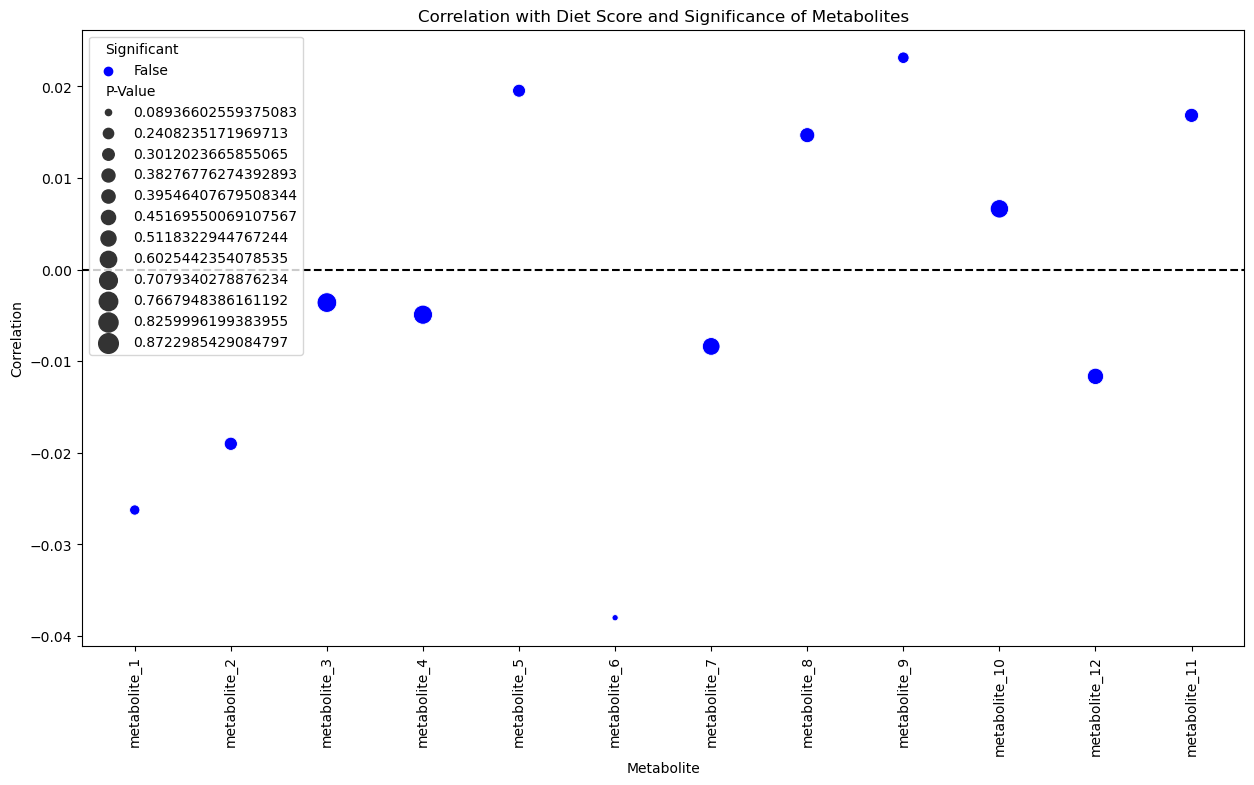

In [ ]:
merged_df = pd.merge(correlations_df, p_values_df, on='Metabolite')


alpha = 0.05  
merged_df['Significant'] = merged_df['P-Value'] < alpha

plt.figure(figsize=(15, 8))

sns.scatterplot(data=merged_df, x='Metabolite', y='Correlation', hue='Significant', palette={True: 'red', False: 'blue'}, size='P-Value', sizes=(20, 200), legend="full")

plt.xticks(rotation=90)
plt.axhline(0, color='black', linestyle='--')  
plt.title('Correlation with Diet Score and Significance of Metabolites')
plt.show()

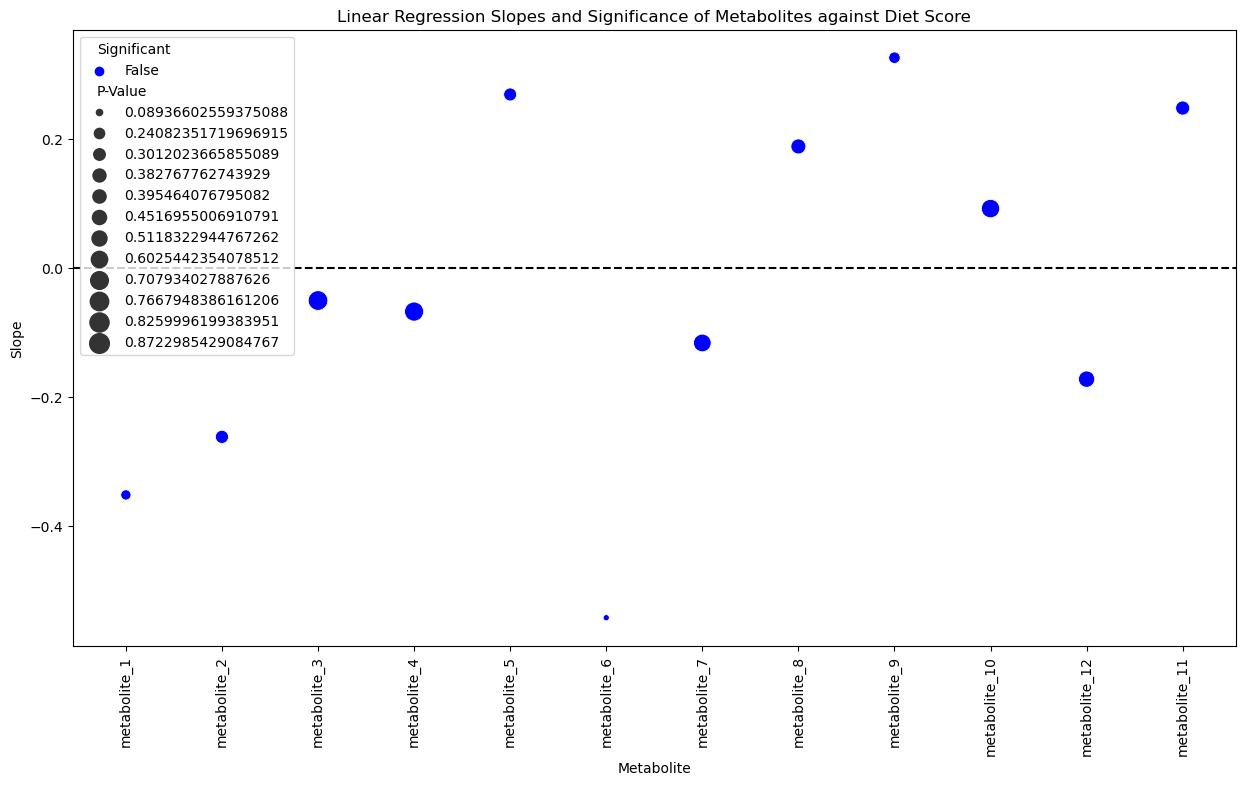

In [ ]:
import statsmodels.api as sm

# Lists to store results
metabolites = []
slopes = []
p_values = []

# Perform linear regression for each metabolite
for metabolite in raw_data.columns[1:-3]:
    X = raw_data[metabolite]
    y = raw_data['diet_score']
    
    # Add a constant (intercept) to the predictor
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X).fit()
    
    # Extract slope and p-value
    slope = model.params[metabolite]
    p_value = model.pvalues[metabolite]
    
    metabolites.append(metabolite)
    slopes.append(slope)
    p_values.append(p_value)

# Create a DataFrame from the results
results_df = pd.DataFrame({
    'Metabolite': metabolites,
    'Slope': slopes,
    'P-Value': p_values
})

# Add a column for significance
alpha = 0.05
results_df['Significant'] = results_df['P-Value'] < alpha

plt.figure(figsize=(15, 8))

# Scatter plot
sns.scatterplot(data=results_df, x='Metabolite', y='Slope', hue='Significant', palette={True: 'red', False: 'blue'}, size='P-Value', sizes=(20, 200), legend="full")

# Rotate x labels for better visibility
plt.xticks(rotation=90)
plt.axhline(0, color='black', linestyle='--')  # Add a line at y=0 for reference
plt.title('Linear Regression Slopes and Significance of Metabolites against Diet Score')
plt.show()